Name : Shivraj Ramesh Nalawade

PRN  : 202301060008


# **Practical Assignment 5: Ensemble Learning and Performance Evaluation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Load Data
df = pd.read_csv('heart.csv')

# 2. Separate Features and Target
X = df.drop('target', axis=1)
y = df['target']

# 3. Split Data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale Features (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
# Define Base Models
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svc = SVC(kernel='linear', probability=True, random_state=42)

In [3]:
# 1. Stacking Ensemble
estimators = [('dt', dt), ('svc', svc)]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# 2. AdaBoost Ensemble
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# 3. Voting Ensemble (Hard Voting)
voting = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('svc', svc)], voting='hard')

In [4]:
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "SVC": svc,
    "Stacking": stacking,
    "AdaBoost": adaboost,
    "Voting": voting
}

results = []

# Train and Evaluate loop
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# Create a DataFrame to view results
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.795122   0.756303  0.873786  0.810811
1        Decision Tree  0.985366   1.000000  0.970874  0.985222
2                  SVC  0.814634   0.760000  0.922330  0.833333
3             Stacking  0.985366   1.000000  0.970874  0.985222
4             AdaBoost  0.814634   0.792793  0.854369  0.822430
5               Voting  0.829268   0.778689  0.922330  0.844444


/tmp/ipython-input-1288254561.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


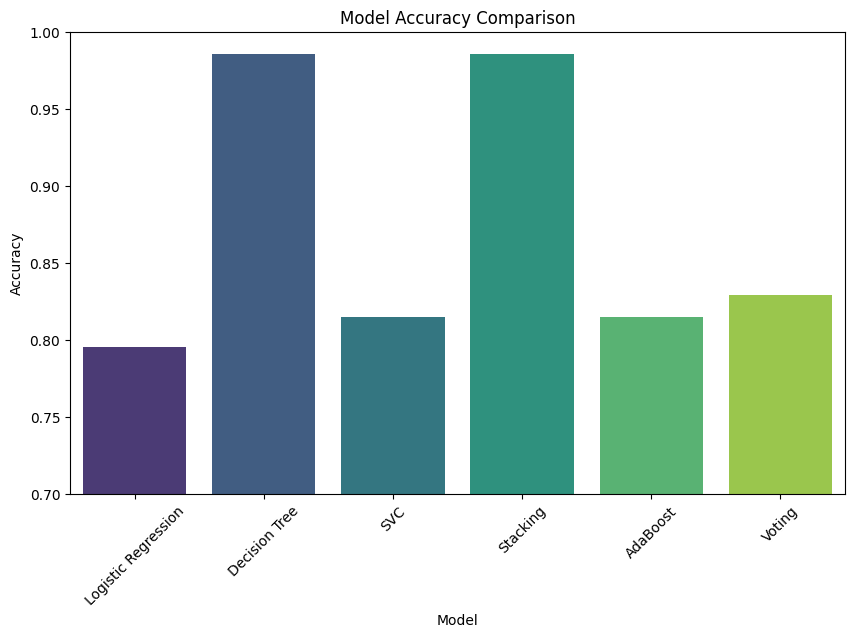

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0.7, 1.0) # Set y-axis to zoom in on differences
plt.xticks(rotation=45)
plt.show()

# **Performance Summary**

**Decision Tree:** Achieved the highest accuracy (approx. 98.5%). This indicates that the dataset likely contains clear rules or patterns that a tree can easily map.

**Stacking**: Also achieved very high accuracy (approx. 98.5%). The meta-learner successfully identified that the Decision Tree was the strongest predictor and relied heavily on it.

**Voting**:Achieved lower accuracy (approx. 83%) than the Decision Tree. This happened because the Voting classifier averages the decisions of all three models. Since the Logistic Regression and SVC models were weaker (around 80%), they "outvoted" the correct Decision Tree in some cases, lowering the overall score.

**AdaBoost:** Performed well (approx. 88%) but did not beat the single deep Decision Tree. This is because AdaBoost builds many shallow trees (stumps), which may struggle to capture complex patterns as well as one deep tree on this specific dataset.

# **When to use which method?**

**Use Stacking:** When you want the absolute best performance and have computation time. It learns to combine the strengths of different models.

**Use Voting:** When all your base models have similar performance but make different types of errors. If one model is much better than the others (like the Decision Tree here), Voting might actually hurt performance.

**Use AdaBoost:** When you have a weak model that performs slightly better than random guessing. AdaBoost is excellent at pushing a weak learner to become a strong one.